## 파이선 프로젝트 : 세대간 교육불평등 자료 시각화<br>
출처: OECD (https://stats.oecd.org/Index.aspx?DataSetCode=EAG_MOB# )

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정

In [4]:
edu = pd.read_csv("edu.csv")
edu.head(30)

,COUNTRY,Country,ISC11A,ISCED-A 2011,SEX,Gender,AGE,Age,PIAAC_CATEGORY,Category,INDICATOR,Indicator,MEASURE,Measure,YEAR,Reference year,Value,Flag Codes,Flags
0,AUS,Australia,L0T2,Below upper secondary education,T,Total,Y25T44,25-44 years,PARED1,Neither parent has attained upper secondary,PIAAC_SHARE_EA,Share of population by educational attainment,VALUE,Value,2012,2012,25.0,NaN,NaN
1,AUS,Australia,L0T2,Below upper secondary education,F,Women,Y25T44,25-44 years,PARED1,Neither parent has attained upper secondary,PIAAC_SHARE_EA,Share of population by educational attainment,VALUE,Value,2012,2012,27.0,NaN,NaN
2,AUS,Australia,L0T2,Below upper secondary education,M,Men,Y25T44,25-44 years,PARED1,Neither parent has attained upper secondary,PIAAC_SHARE_EA,Share of population by educational attainment,VALUE,Value,2012,2012,24.0,NaN,NaN
3,AUS,Australia,L0T2,Below upper secondary education,T,Total,Y25T44,25-44 years,PARED2,At least one parent has attained secondary and...,PIAAC_SHARE_EA,Share of population by educational attainment,VALUE,Value,2012,2012,18.0,NaN,NaN
4,AUS,Australia,L0T2,Below upper secondary education,F,Women,Y25T44,25-44 years,PARED2,At least one parent has attained secondary and...,PIAAC_SHARE_EA,Share of population by educational attainment,VALUE,Value,2012,2012,17.0,NaN,NaN
5,AUS,Australia,L0T2,Below upper secondary education,M,Men,Y25T44,25-44 years,PARED2,At least one parent has attained secondary and...,PIAAC_SHARE_EA,Share of population by educational attainment,VALUE,Value,2012,2012,19.0,NaN,NaN
6,AUS,Australia,L0T2,Below upper secondary education,T,Total,Y25T44,25-44 years,PARED3,At least one parent has attained tertiary,PIAAC_SHARE_EA,Share of population by educational attainment,VALUE,Value,2012,2012,6.0,NaN,NaN
7,AUS,Australia,L0T2,Below upper secondary education,F,Women,Y25T44,25-44 years,PARED3,At least one parent has attained tertiary,PIAAC_SHARE_EA,Share of population by educational attainment,VALUE,Value,2012,2012,6.0,NaN,NaN
8,AUS,Australia,L0T2,Below upper secondary education,M,Men,Y25T44,25-44 years,PARED3,At least one parent has attained tertiary,PIAAC_SHARE_EA,Share of population by educational attainment,VALUE,Value,2012,2012,6.0,NaN,NaN
9,AUS,Australia,L0T2,Below upper secondary education,T,Total,Y25T44,25-44 years,_T,Total,PIAAC_SHARE_EA,Share of population by educational attainment,VALUE,Value,2012,2012,17.0,NaN,NaN


In [5]:
del edu['COUNTRY']

In [6]:
del edu["ISC11A"]

In [7]:
del edu["AGE"]

In [8]:
del edu["PIAAC_CATEGORY"]

In [9]:
del edu["INDICATOR"]

In [10]:
del edu["Indicator"]

In [11]:
del edu["Measure"]

In [12]:
del edu["Reference year"]

In [13]:
del edu["Flag Codes"]

In [14]:
del edu["Flags"]

In [15]:
del edu["Age"]

In [16]:
del edu["Gender"]

In [17]:
del edu["MEASURE"]

In [18]:
 del edu["YEAR"]

In [19]:
edu

,Country,ISCED-A 2011,SEX,Category,Value
0,Australia,Below upper secondary education,T,Neither parent has attained upper secondary,25.0
1,Australia,Below upper secondary education,F,Neither parent has attained upper secondary,27.0
2,Australia,Below upper secondary education,M,Neither parent has attained upper secondary,24.0
3,Australia,Below upper secondary education,T,At least one parent has attained secondary and...,18.0
4,Australia,Below upper secondary education,F,At least one parent has attained secondary and...,17.0
...,...,...,...,...,...
751,Slovenia,Tertiary education,F,At least one parent has attained tertiary,73.0
752,Slovenia,Tertiary education,M,At least one parent has attained tertiary,50.0
753,Slovenia,Tertiary education,T,Total,33.0
754,Slovenia,Tertiary education,F,Total,44.0


In [20]:
edu = edu.loc[edu['Category']!= 'Total']

In [21]:
edu = edu.rename(columns={"Country" : "국가", "ISCED-A 2011" : "본인교육수준", "SEX" : "성별", "Category" : "부모교육수준", 
                          "MEASURE" : "통계치", "Value" : "값"})

In [22]:
edu["본인교육수준"] = edu["본인교육수준"].replace("Below upper secondary education","중졸이하")

In [23]:
edu["본인교육수준"] = edu["본인교육수준"].replace("Upper secondary and post-secondary non-tertiary education","고졸")

In [24]:
edu["본인교육수준"] = edu["본인교육수준"].replace("Tertiary education","대졸이상")

In [25]:
edu["부모교육수준"] = edu["부모교육수준"].replace("At least one parent has attained secondary and post-secondary, non-tertiary","한명이상고졸")

In [26]:
edu["부모교육수준"] = edu["부모교육수준"].replace("Neither parent has attained upper secondary","부모모두중졸이하")

In [27]:
edu["부모교육수준"] = edu["부모교육수준"].replace("At least one parent has attained tertiary","한명이상대졸이상")

In [28]:
edu["부모교육수준"] = edu["부모교육수준"].replace("Total","총합")

In [29]:
 edu

,국가,본인교육수준,성별,부모교육수준,값
0,Australia,중졸이하,T,부모모두중졸이하,25.0
1,Australia,중졸이하,F,부모모두중졸이하,27.0
2,Australia,중졸이하,M,부모모두중졸이하,24.0
3,Australia,중졸이하,T,한명이상고졸,18.0
4,Australia,중졸이하,F,한명이상고졸,17.0
...,...,...,...,...,...
748,Slovenia,대졸이상,F,한명이상고졸,47.0
749,Slovenia,대졸이상,M,한명이상고졸,22.0
750,Slovenia,대졸이상,T,한명이상대졸이상,60.0
751,Slovenia,대졸이상,F,한명이상대졸이상,73.0


In [30]:
#edu["국가"] = edu["국가"].replace("Japan","일본") 

In [31]:
#edu["국가"] = edu["국가"].replace("Korea","한국") 

In [32]:
#edu["국가"] = edu["국가"].replace("United States","미국") 

In [33]:
#edu["국가"] = edu["국가"].replace("Germany","독일")

In [34]:
#edu["성별"] = edu["성별"].replace("M","남")

In [35]:
#edu["성별"] = edu["성별"].replace("F","여")

In [36]:
edu

,국가,본인교육수준,성별,부모교육수준,값
0,Australia,중졸이하,T,부모모두중졸이하,25.0
1,Australia,중졸이하,F,부모모두중졸이하,27.0
2,Australia,중졸이하,M,부모모두중졸이하,24.0
3,Australia,중졸이하,T,한명이상고졸,18.0
4,Australia,중졸이하,F,한명이상고졸,17.0
...,...,...,...,...,...
748,Slovenia,대졸이상,F,한명이상고졸,47.0
749,Slovenia,대졸이상,M,한명이상고졸,22.0
750,Slovenia,대졸이상,T,한명이상대졸이상,60.0
751,Slovenia,대졸이상,F,한명이상대졸이상,73.0


In [37]:
edu = edu.loc[edu["성별"] != "T"]

In [38]:
edu1 = edu["부모교육수준"] == "부모모두중줄이하"

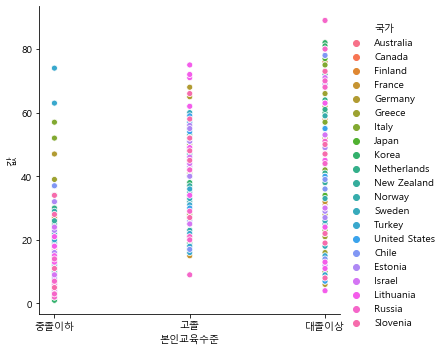

In [39]:
# 부모의 교육 수준이 '한명이상 고졸'인 경우 본인 교육수준 국가별 비교
edu1
sns.relplot(data = edu,x='본인교육수준',y='값', hue="국가")

In [40]:
# 부모의 교육 수준이 '한명 이상 대졸 이상'인 경우 본인 교육수준 국가별 비교

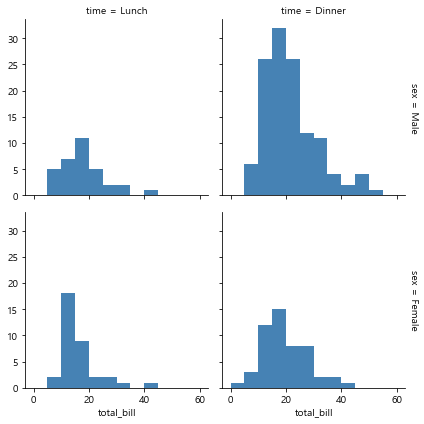

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

In [42]:
# 한국

In [43]:
country1 = edu.loc[edu["국가"] == "Korea"]

In [44]:
country1

,국가,본인교육수준,성별,부모교육수준,값
289,Korea,중졸이하,F,부모모두중졸이하,8.0
290,Korea,중졸이하,M,부모모두중졸이하,7.0
292,Korea,중졸이하,F,한명이상고졸,1.0
293,Korea,중졸이하,M,한명이상고졸,1.0
295,Korea,중졸이하,F,한명이상대졸이상,NaN
296,Korea,중졸이하,M,한명이상대졸이상,NaN
301,Korea,고졸,F,부모모두중졸이하,53.0
302,Korea,고졸,M,부모모두중졸이하,47.0
304,Korea,고졸,F,한명이상고졸,40.0
305,Korea,고졸,M,한명이상고졸,38.0


In [45]:
#table1= pd.pivot_table(country1, values='값', index=['부모교육수준'],
#...                     columns=[ '본인교육수준'], aggfunc=np.sum, fill_value=0)

In [46]:
#table1.reset_index()

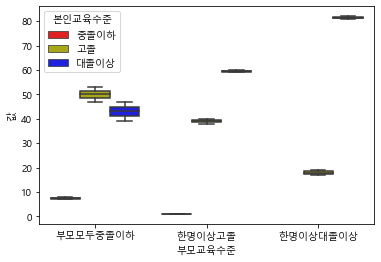

In [47]:
sns.boxplot(x="부모교육수준", y="값", hue="본인교육수준", data=country1, palette=["r","y","b"])

In [48]:
#일본

In [49]:
country2 = edu.loc[edu["국가"] == "Japan"]

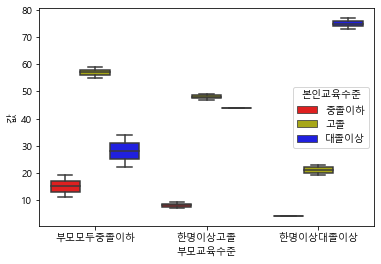

In [50]:
sns.boxplot(x="부모교육수준", y="값", hue="본인교육수준", data=country2, palette=["r","y","b"])

In [51]:
#미국

In [52]:
country3 = edu.loc[edu["국가"] == "United States"]

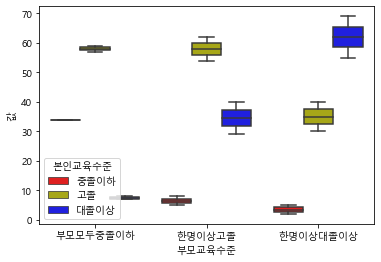

In [53]:
sns.boxplot(x="부모교육수준", y="값", hue="본인교육수준", data=country3, palette=["r","y","b"])

In [54]:
#독일

In [55]:
country4 = edu.loc[edu["국가"] == "Germany"]

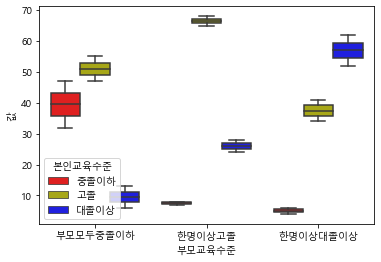

In [56]:
sns.boxplot(x="부모교육수준", y="값", hue="본인교육수준", data=country4, palette=["r","y","b"])

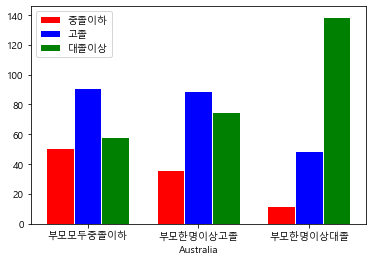

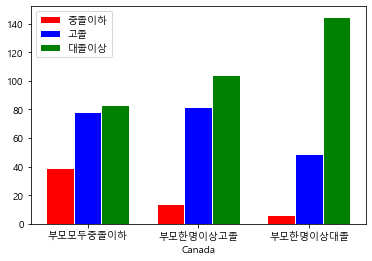

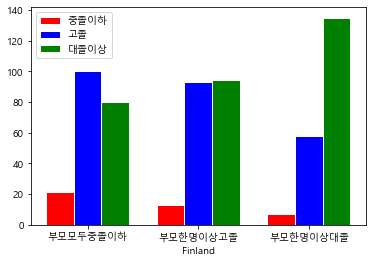

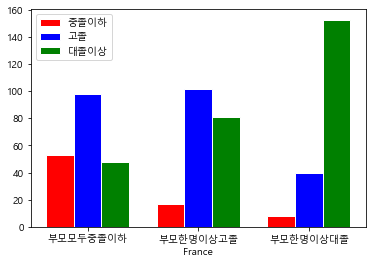

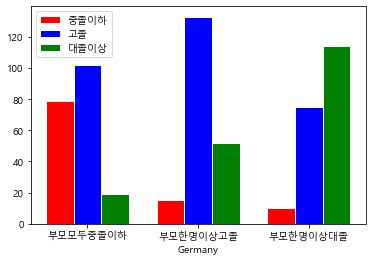

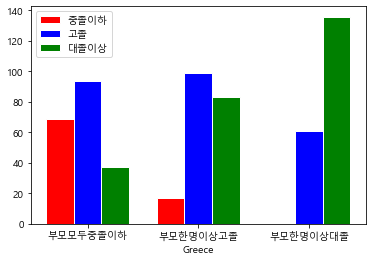

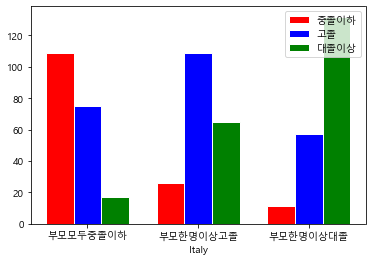

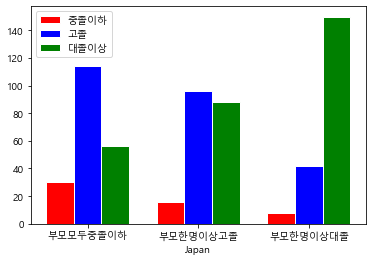

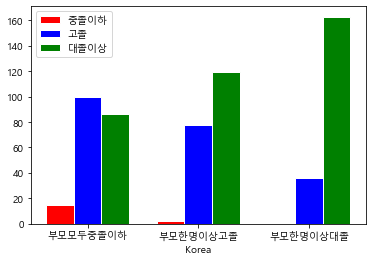

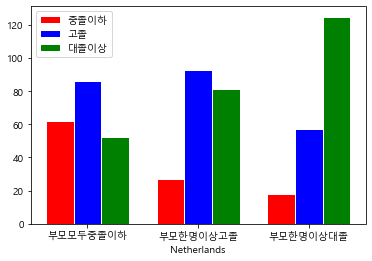

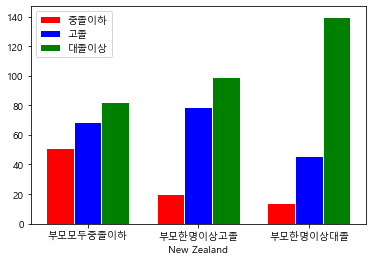

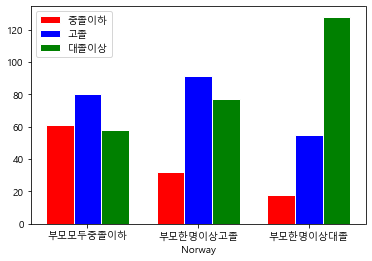

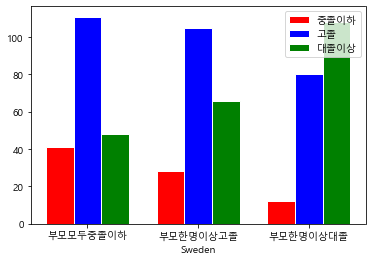

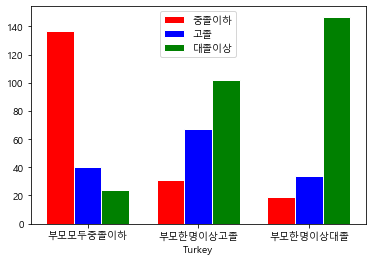

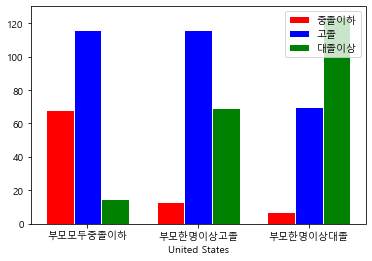

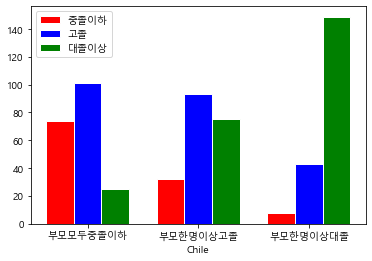

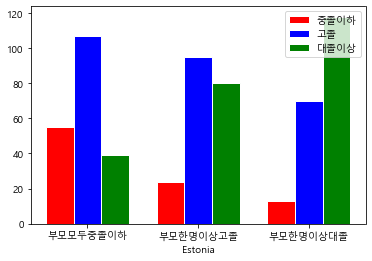

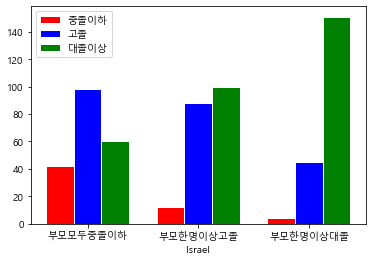

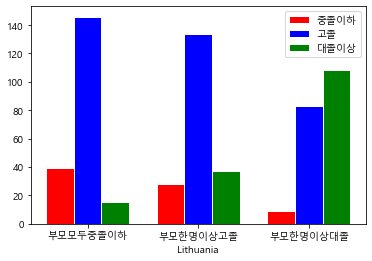

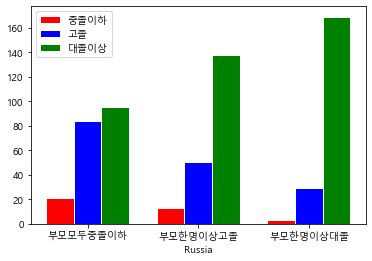

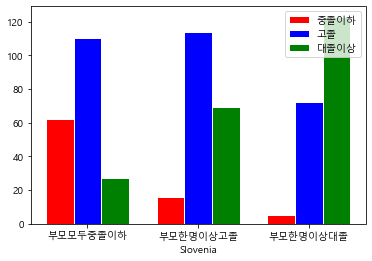

In [57]:
#국가별 그래프

country = pd.unique(edu['국가'])
for i in country:
    country = edu.loc[edu['국가'] == i]
    table= pd.pivot_table(country, values='값', index=['부모교육수준'],
                     columns=[ '본인교육수준'], aggfunc=np.sum, fill_value=0)
    # set width of bar
    barWidth = 0.25
 
    # set height of bar
    bars1 = table['중졸이하'].values
    bars2 = table['고졸'].values
    bars3 = table['대졸이상'].values
 
    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
 
    # Make the plot
    plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='중졸이하')
    plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='고졸')
    plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='대졸이상')

    # Add xticks on the middle of the group bars
    plt.xlabel(i)
    plt.xticks([r + barWidth for r in range(len(bars1))], ['부모모두중졸이하', '부모한명이상고졸', '부모한명이상대졸'])
 
    # Create legend & Show graphic
    plt.legend()
    plt.show()

In [58]:
pd.options.display.float_format='{:,.0f}'.format

In [59]:
#본인 중졸이하,부모 모두중졸이하 각 국가 지표

In [60]:
middleSchoolGraduated = edu.loc[(edu['본인교육수준'] == "중졸이하")&(edu['부모교육수준'] == '부모모두중졸이하')]
middleSchoolGraduated.sort_values(by=['값'],ascending=False,inplace = True)
middleSchoolGraduated

,국가,본인교육수준,성별,부모교육수준,값
469,Turkey,중졸이하,F,부모모두중졸이하,74
470,Turkey,중졸이하,M,부모모두중졸이하,63
218,Italy,중졸이하,M,부모모두중졸이하,57
217,Italy,중졸이하,F,부모모두중졸이하,52
145,Germany,중졸이하,F,부모모두중졸이하,47
182,Greece,중졸이하,M,부모모두중졸이하,39
542,Chile,중졸이하,M,부모모두중졸이하,37
541,Chile,중졸이하,F,부모모두중졸이하,37
722,Slovenia,중졸이하,M,부모모두중졸이하,34
506,United States,중졸이하,M,부모모두중졸이하,34


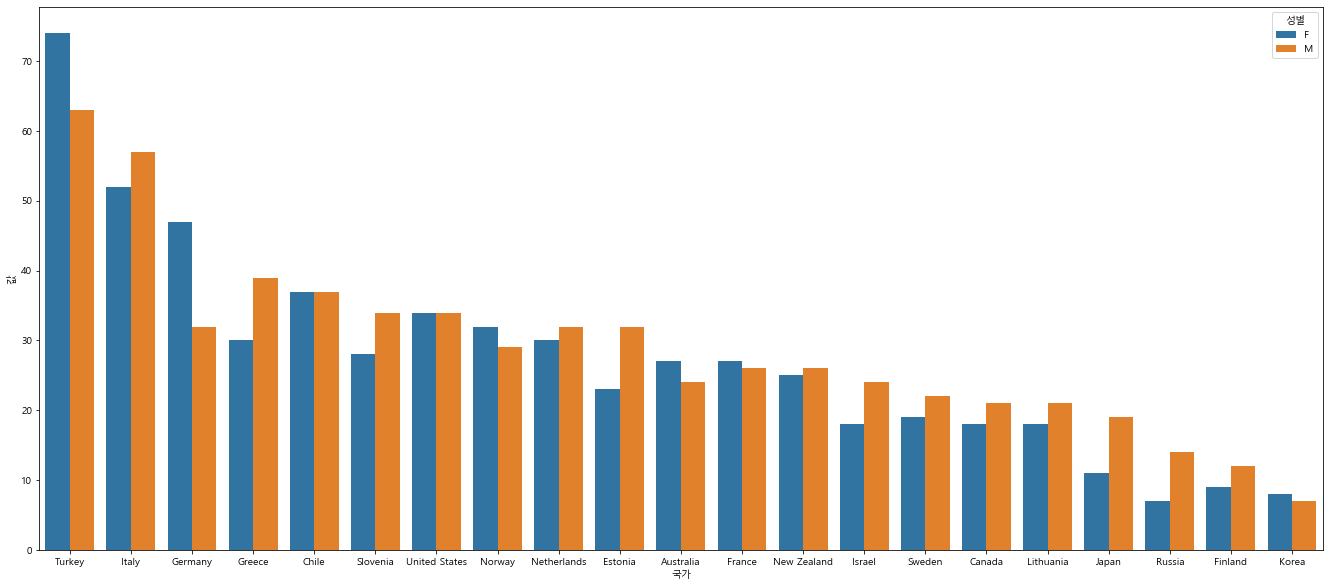

In [61]:
plt.figure(figsize=(23,10))
sns.barplot(x="국가", y="값", hue="성별", data=middleSchoolGraduated)

In [62]:
#본인 고졸,부모 한명이상고졸 각 국가 지표

In [63]:
highSchoolGraduated = edu.loc[(edu['본인교육수준'] == '고졸') & (edu['부모교육수준'] == '한명이상고졸')]
highSchoolGraduated.sort_values(by=['값'],ascending=False,inplace = True)
highSchoolGraduated.head(10)

,국가,본인교육수준,성별,부모교육수준,값
665,Lithuania,고졸,M,한명이상고졸,72
160,Germany,고졸,F,한명이상고졸,68
737,Slovenia,고졸,M,한명이상고졸,66
161,Germany,고졸,M,한명이상고졸,65
664,Lithuania,고졸,F,한명이상고졸,62
521,United States,고졸,M,한명이상고졸,62
233,Italy,고졸,M,한명이상고졸,57
449,Sweden,고졸,M,한명이상고졸,57
125,France,고졸,M,한명이상고졸,57
89,Finland,고졸,M,한명이상고졸,56


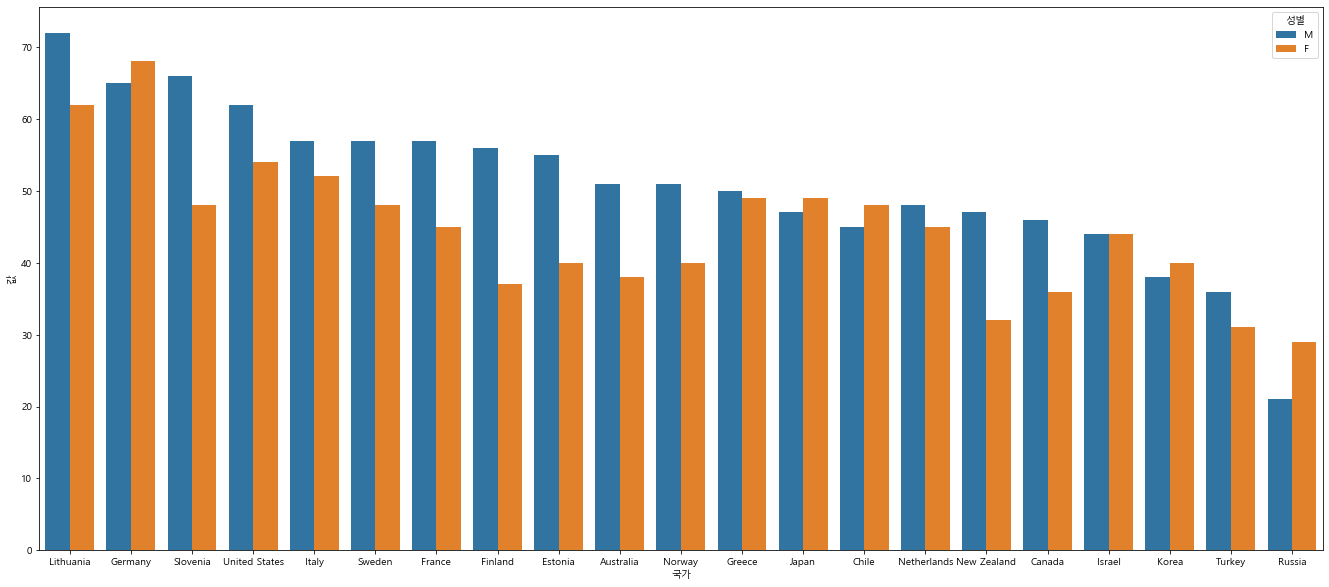

In [64]:
plt.figure(figsize=(23,10))
sns.barplot(x="국가", y="값", hue="성별", data=highSchoolGraduated)

In [65]:
#본인 대졸이상,부모 한명이상대졸이상 각 국가 지표

In [66]:
universityGraduation = edu.loc[(edu['본인교육수준'] == '대졸이상') & (edu['부모교육수준'] == '한명이상대졸이상')]
universityGraduation.sort_values(by=['값'],ascending=False,inplace = True)
universityGraduation.head(10)

,국가,본인교육수준,성별,부모교육수준,값
715,Russia,대졸이상,F,한명이상대졸이상,89
319,Korea,대졸이상,F,한명이상대졸이상,82
139,France,대졸이상,F,한명이상대졸이상,82
320,Korea,대졸이상,M,한명이상대졸이상,81
716,Russia,대졸이상,M,한명이상대졸이상,80
643,Israel,대졸이상,F,한명이상대졸이상,80
31,Australia,대졸이상,F,한명이상대졸이상,78
571,Chile,대졸이상,F,한명이상대졸이상,78
500,Turkey,대졸이상,M,한명이상대졸이상,78
283,Japan,대졸이상,F,한명이상대졸이상,77


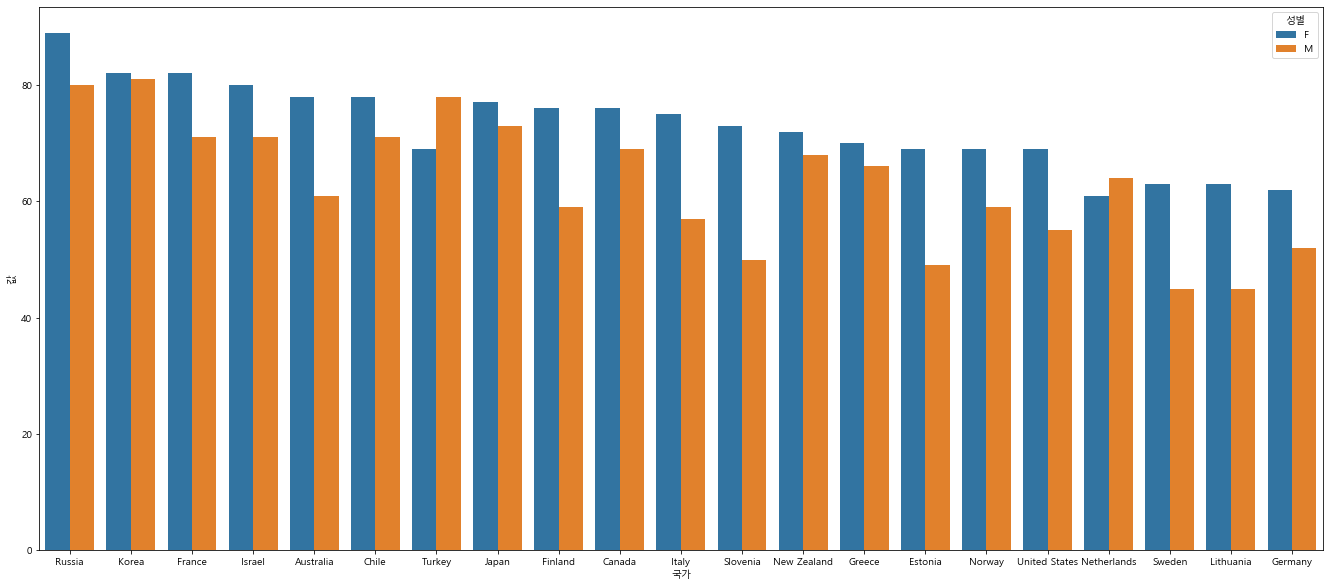

In [67]:
plt.figure(figsize=(23,10))
sns.barplot(x="국가", y="값", hue="성별", data=universityGraduation)